Anubroto Ghose (21BAI1102)

https://colab.research.google.com/drive/1ipJ6w9kewRcoGfCh4K_KDN7y_9Ee7UYt?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Implement K-means clustering algorithm in Flame And Toy datasets where number of clusters = 2

Importing flame and toy datasets

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score

In [3]:
flame_data = pd.read_csv('/content/gdrive/MyDrive/flame.csv')
toy_data = pd.read_csv('/content/gdrive/MyDrive/toy.csv')

In [4]:
flame_data.head()

,1.85,27.8,1
0,1.35,26.65,1
1,1.40,23.25,2
2,0.85,23.05,2
3,0.50,22.35,2
4,0.65,21.35,2


In [5]:
toy_data.head()

,0.85,17.45,2
0,0.75,15.60,2
1,3.30,15.45,2
2,5.25,14.20,2
3,4.90,15.65,2
4,5.35,15.85,2


In [6]:
flame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.85    239 non-null    float64
 1   27.8    239 non-null    float64
 2   1       239 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.7 KB


In [7]:
toy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.85    372 non-null    float64
 1   17.45   372 non-null    float64
 2   2       372 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


array([[<Axes: title={'center': '1.85'}>,
        <Axes: title={'center': '27.8'}>],
       [<Axes: title={'center': '1'}>, <Axes: >]], dtype=object)

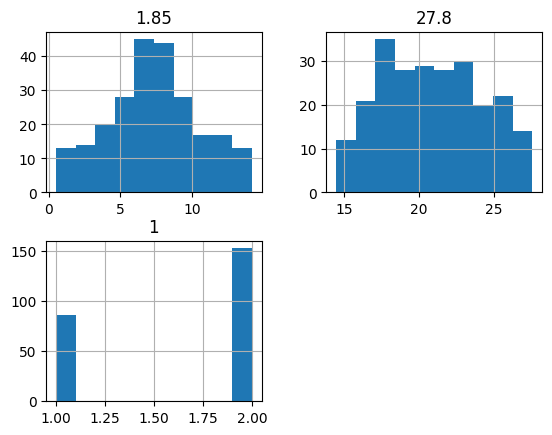

In [8]:
flame_data.hist()

array([[<Axes: title={'center': '0.85'}>,
        <Axes: title={'center': '17.45'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

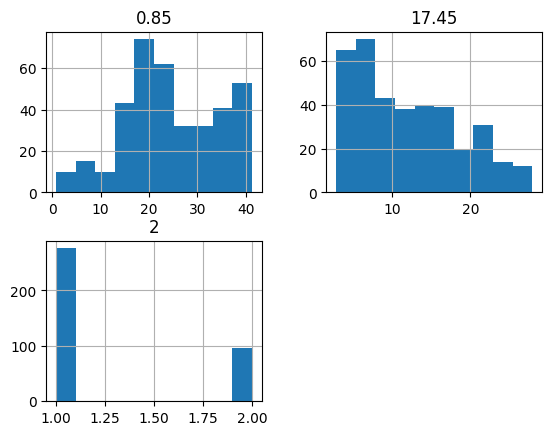

In [9]:
toy_data.hist()

<Axes: >

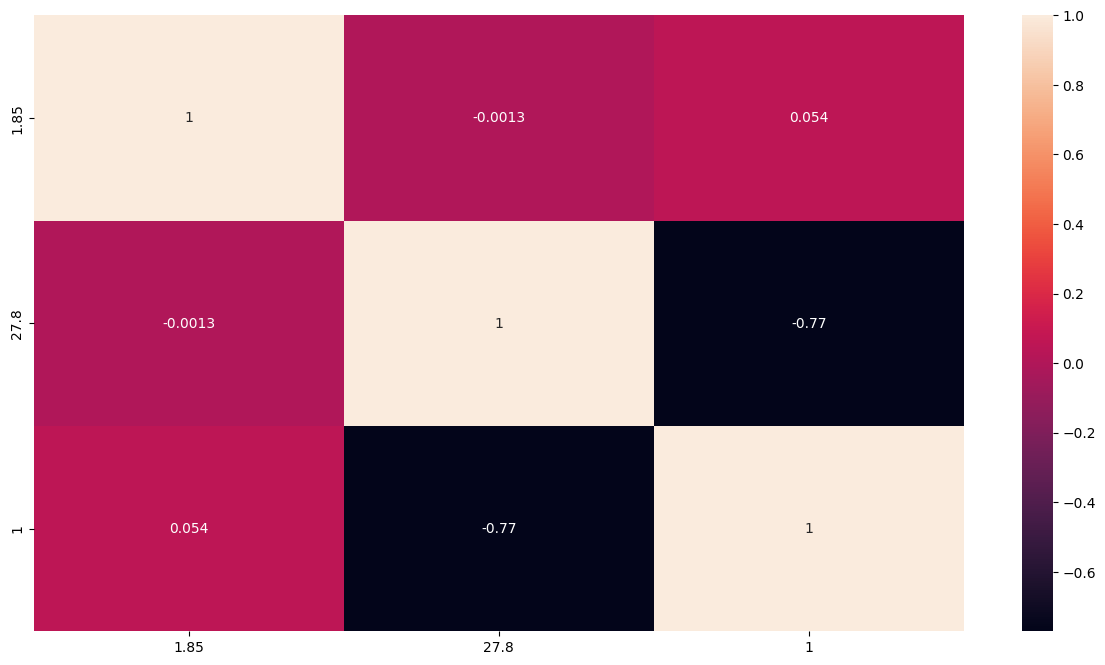

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(flame_data.corr(),annot=True)

<Axes: >

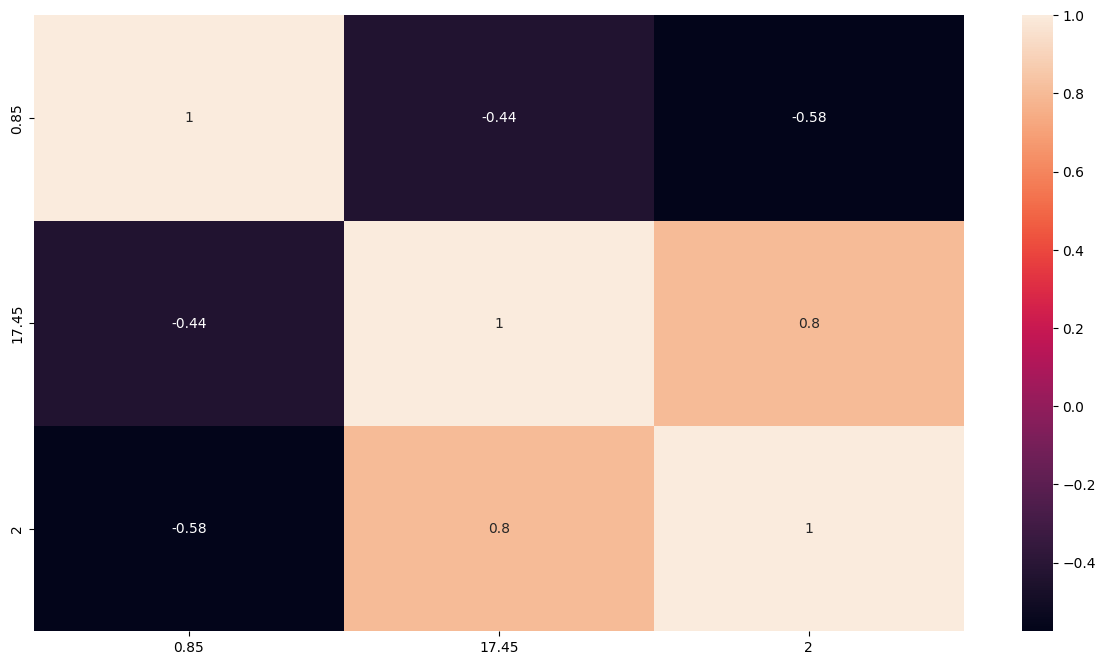

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(toy_data.corr(),annot=True)

Calculating the clusters manually

In [12]:
def kmeans(data, k, max_iterations=100):
    centroids = data.sample(k).values
    num_iterations = 0
    convergence = False

    while (not convergence) and (num_iterations < max_iterations):
        num_iterations += 1
        distances = []
        for centroid in centroids:
            distances.append(((data - centroid) ** 2).sum(axis=1))

        labels = pd.concat(distances, axis=1).idxmin(axis=1)

        new_centroids = data.groupby(labels).mean().values

        if (new_centroids == centroids).all():
            convergence = True

        centroids = new_centroids

    return labels.values

Dividing the flame dataset into Clusters

In [13]:
flame_labels = kmeans(flame_data, 2)
flame_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Dividing the toy dataset into Clusters

In [14]:
toy_labels = kmeans(toy_data, 2)
toy_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Plotting before and after implementing clustering in the given datasets

Plotting Flame dataset

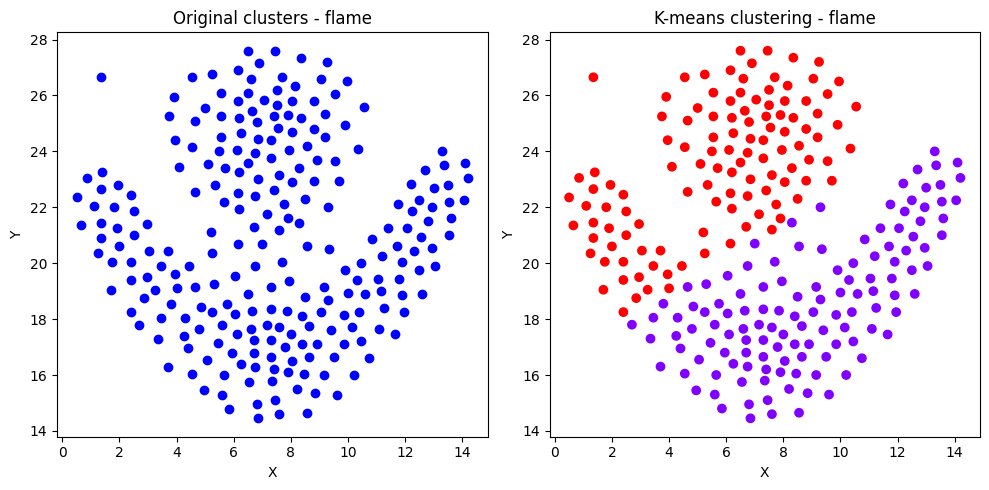

In [15]:
# Visualize the original and clustered datasets for flame dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(flame_data.iloc[:, 0], flame_data.iloc[:, 1], c='blue', label='Original')
plt.title('Original clusters - flame')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(flame_data.iloc[:, 0], flame_data.iloc[:, 1], c=flame_labels, cmap='rainbow', label='Clustered')
plt.title('K-means clustering - flame')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

Plotting Toy dataset

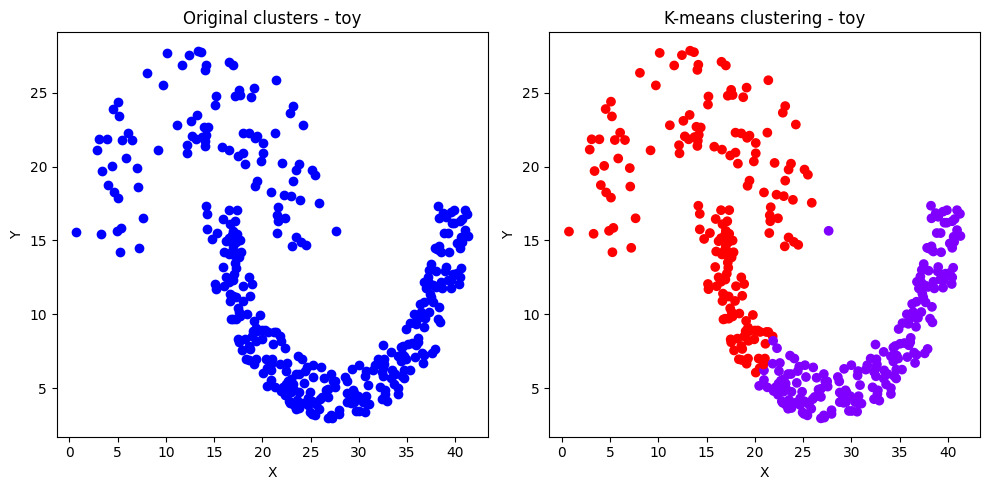

In [16]:
# Visualize the original and clustered datasets for toy dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(toy_data.iloc[:, 0], toy_data.iloc[:, 1], c='blue', label='Original')
plt.title('Original clusters - toy')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(toy_data.iloc[:, 0], toy_data.iloc[:, 1], c=toy_labels, cmap='rainbow', label='Clustered')
plt.title('K-means clustering - toy')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

Implementing the Clustering using Sklearn

In [17]:
from sklearn.cluster import KMeans

Dividing the flame dataset into Clusters

In [18]:
kmeans_flame = KMeans(n_clusters=2, random_state=0)
kmeans_flame

KMeans(n_clusters=2, random_state=0)

In [19]:
flame_labels = kmeans_flame.fit_predict(flame_data)
flame_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

Dividing the toy dataset into Clusters

In [20]:
kmeans_toy = KMeans(n_clusters=2, random_state=0)
kmeans_toy

KMeans(n_clusters=2, random_state=0)

In [21]:
toy_labels = kmeans_toy.fit_predict(toy_data)
toy_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Plotting before and after implementing clustering in the given datasets

Plotting Flame dataset

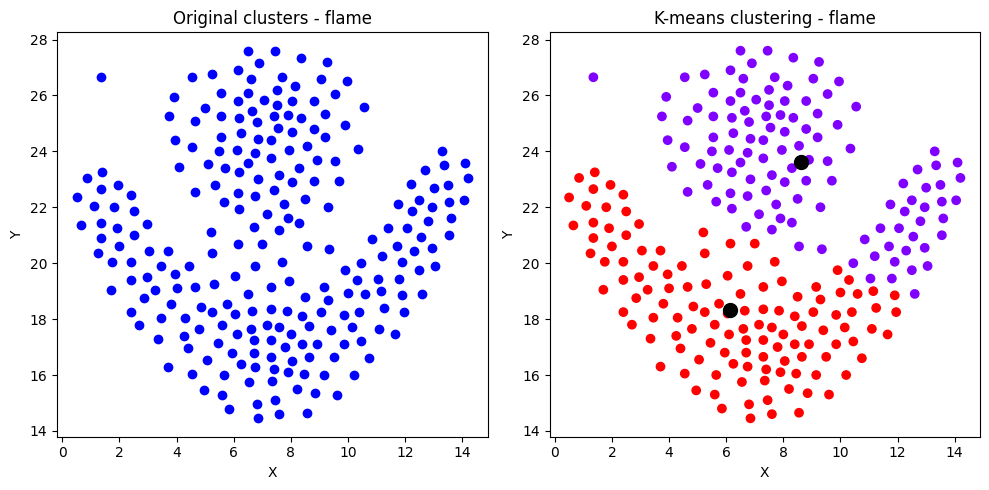

In [22]:
# Visualize the original and clustered datasets for flame dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(flame_data.iloc[:, 0], flame_data.iloc[:, 1], c='blue', label='Original')
plt.title('Original clusters - flame')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(flame_data.iloc[:, 0], flame_data.iloc[:, 1], c=flame_labels, cmap='rainbow', label='Clustered')
plt.scatter(kmeans_flame.cluster_centers_[:, 0], kmeans_flame.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-means clustering - flame')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

Plotting Toy dataset

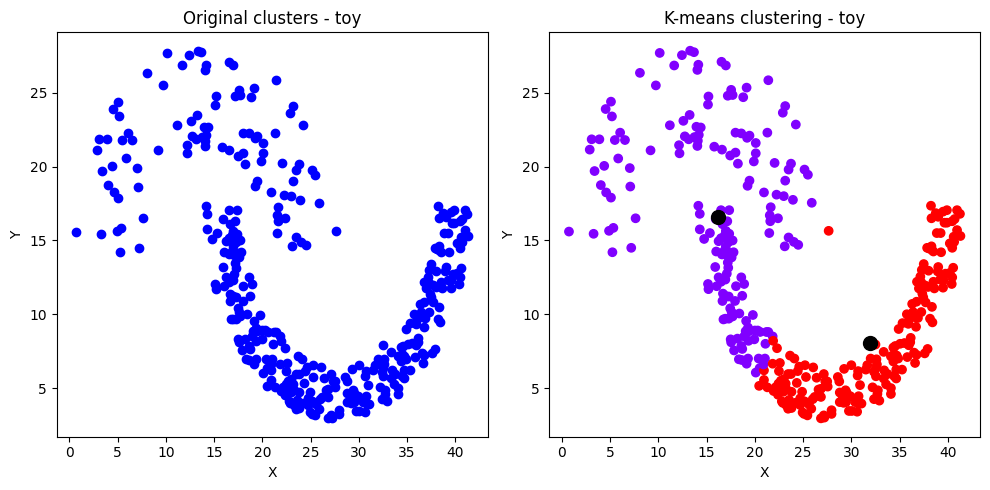

In [23]:
# Visualize the original and clustered datasets for toy dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(toy_data.iloc[:, 0], toy_data.iloc[:, 1], c='blue', label='Original')
plt.title('Original clusters - toy')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(toy_data.iloc[:, 0], toy_data.iloc[:, 1], c=toy_labels, cmap='rainbow', label='Clustered')
plt.scatter(kmeans_toy.cluster_centers_[:, 0], kmeans_toy.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-means clustering - toy')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

Implementing the clustering on Shop dataset

Importing the Shop dataset

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score

In [25]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
data = pd.read_csv('/content/gdrive/MyDrive/shop.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

<Axes: >

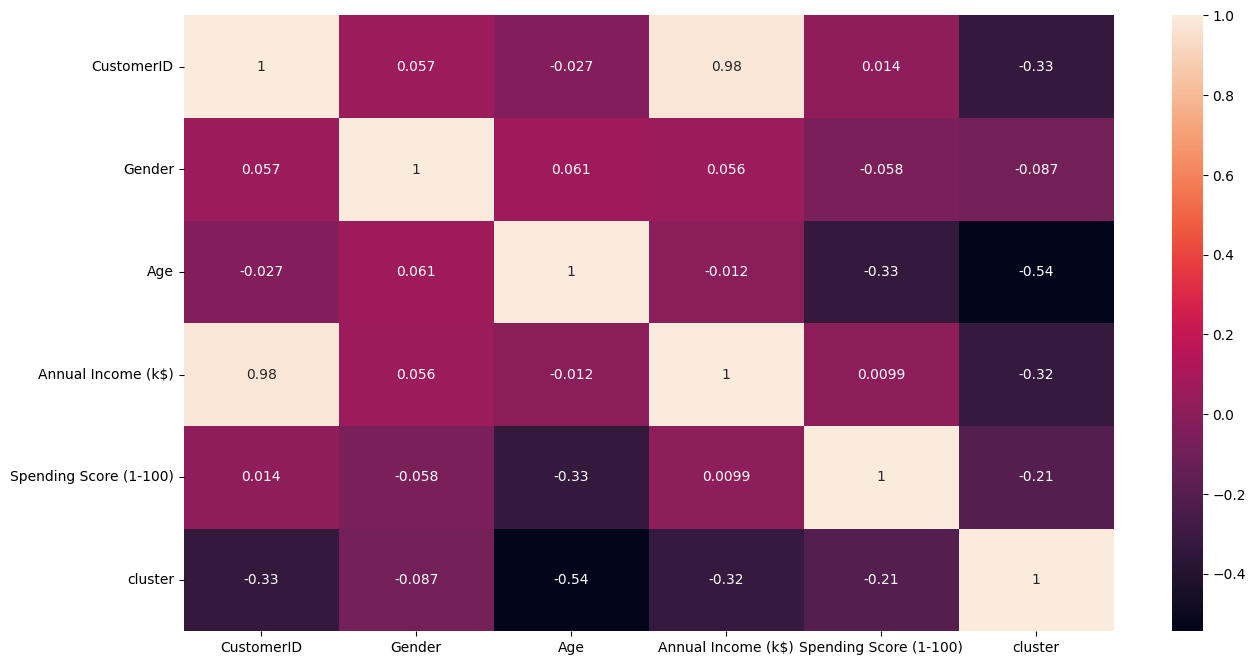

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [28]:
X = data[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [30]:
np.array(data['cluster'])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 5,
       4, 3, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Calculating Silhouette Score and for Rand Score for each number of clusters

In [31]:
inertia = []
silhouette_scores = []
rand_scores = []
max_clusters = 10

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init = 8)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    rand_scores.append(adjusted_rand_score(data['Gender'], kmeans.labels_))

Displaying the metrics

In [32]:
print("Evaluation Metrics:")
print("Number of Clusters\tInertia\t\t\tSilhouette Score\tRand Index")
for i in range(len(inertia)):
    print(f"{i+2}\t\t\t{inertia[i]}\t{silhouette_scores[i]}\t{rand_scores[i]}")

Evaluation Metrics:
Number of Clusters	Inertia			Silhouette Score	Rand Index
2			588.8026767824938	0.2518152915788437	-0.002473538213517084
3			476.7732065607644	0.25971470188178947	0.3304986765364103
4			388.6517944744494	0.29948092119527786	0.49284833361824265
5			325.68279040738923	0.31664426428574227	0.37578214646979563
6			275.9579892504037	0.33252815017028153	0.288382334385998
7			236.6928787710081	0.3562343505053694	0.2497138047121155
8			199.75046112065576	0.3879927454351689	0.2550620250025879
9			174.12493921599275	0.4025192944683836	0.22801421189944235
10			152.02983429775685	0.42076374869477745	0.19700079961567118


Plotting the performance

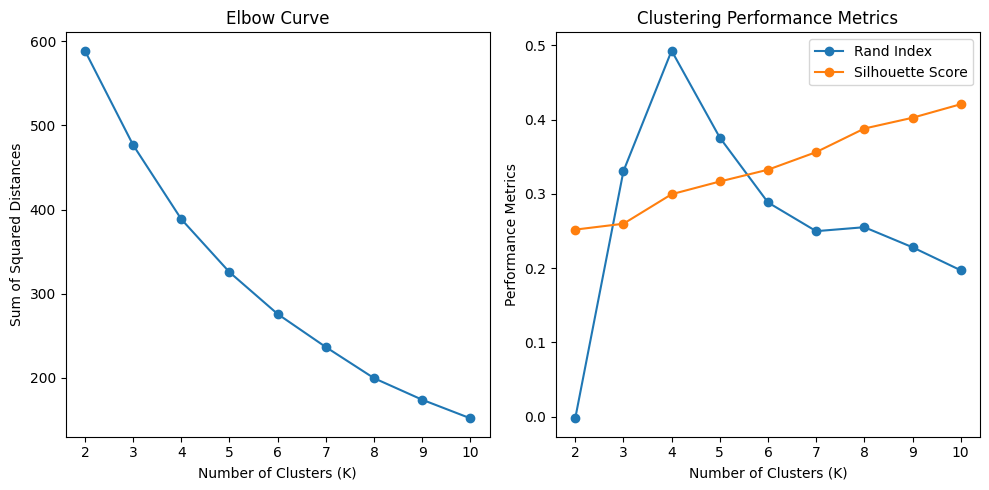

In [33]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')

# Plot the Rand index and Silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(2,11), rand_scores, marker='o', label='Rand Index')
plt.plot(range(2,11), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Performance Metrics')
plt.title('Clustering Performance Metrics')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [34]:
inertia

[588.8026767824938,
 476.7732065607644,
 388.6517944744494,
 325.68279040738923,
 275.9579892504037,
 236.6928787710081,
 199.75046112065576,
 174.12493921599275,
 152.02983429775685]

In [35]:
k = np.arange(2,11)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [36]:
y = np.array(inertia)
y

array([588.80267678, 476.77320656, 388.65179447, 325.68279041,
       275.95798925, 236.69287877, 199.75046112, 174.12493922,
       152.0298343 ])

In [37]:
m = float("-inf")
iter = 0
mean_f = 0
mean_l = 0
mean =0
for i in range(1,8):
  y1 = (y[i] - y[0])
  y2 = (y[8] - y[i])
  k1 = (k[i] - k[0])
  k2 = (k[i] - k[8])
  d1 = y1/k1
  mean_f += d1
  d2 = y2/k2
  mean_l += d2

  if m < abs(d1-d2):
    m = abs(d1-d2)
    iter = i

mean_f/=7
mean_l/=7

diff = float("inf")
for i in range(1,8):
  y1 = (y[i] - y[0])
  y2 = (y[8] - y[i])
  k1 = (k[i] - k[0])
  k2 = (k[i] - k[8])
  d1 = y1/k1
  d2 = y2/k2

  if abs(d1 - mean_f)+ abs(d2-mean_l) < diff:
    diff = abs(d1 - mean_f)+ abs(d2-mean_l)
    iter = i



iter

4

In [38]:
iter

4

The number of clusters to be implemented

In [39]:
n_c = k[iter]
n_c

6

Creating our model from the optimal number of clusters chosen

In [46]:
kmeans_shop = KMeans(n_clusters=n_c, random_state=42,n_init = 100)
kmeans_shop

KMeans(n_clusters=6, n_init=100, random_state=42)

Fitting our model with the help of optimal number of clusters

In [47]:
shop_labels = kmeans_shop.fit_predict(X)
shop_labels

array([3, 3, 4, 4, 4, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 3, 4, 3, 1, 4, 1, 3,
       0, 3, 0, 3, 0, 3, 0, 4, 1, 4, 1, 3, 0, 4, 0, 4, 0, 4, 0, 3, 1, 4,
       0, 4, 0, 4, 4, 4, 0, 3, 4, 1, 0, 1, 0, 1, 4, 1, 1, 3, 0, 0, 1, 3,
       0, 0, 3, 4, 1, 0, 0, 0, 1, 3, 0, 3, 4, 0, 1, 3, 1, 0, 4, 1, 0, 4,
       4, 0, 0, 3, 1, 0, 4, 3, 0, 4, 1, 3, 4, 0, 1, 3, 1, 4, 0, 1, 1, 1,
       1, 4, 0, 3, 4, 4, 0, 0, 0, 0, 3, 0, 0, 3, 4, 2, 5, 3, 1, 3, 5, 3,
       4, 2, 5, 2, 5, 3, 5, 2, 0, 3, 4, 2, 5, 3, 1, 2, 5, 3, 5, 3, 5, 2,
       5, 2, 5, 2, 5, 2, 0, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 3, 5, 3, 5, 2,
       5, 3, 5, 3, 5, 2, 5, 2, 5, 3, 5, 3, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

Checking our accuracy and precision

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("The accuracy score with the model = ",accuracy_score(np.array(data['cluster']), np.array(shop_labels), normalize=True)*100,"%")

The accuracy score with the model =  18.5 %
